In [1]:
import pylab

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [6]:
import numpy as np
import matplotlib.pyplot as plt

Enter an expression in x to graph: x*sin(x)


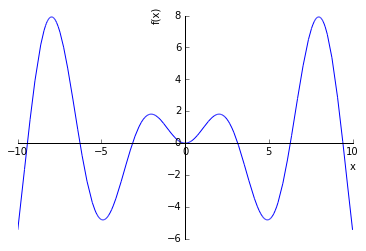

In [7]:
# Create graphs from algebraic expression

from sympy import Symbol, plot
x = Symbol('x')
expr = input('Enter an expression in x to graph: ')
p = plot(expr)

Enter an expression in x to graph: 2*x**3


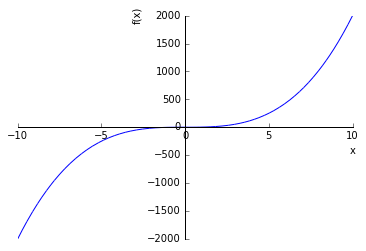

In [8]:
# Create graphs from algebraic expression

from sympy import Symbol, plot
x = Symbol('x')
expr = input('Enter an expression in x to graph: ')
p = plot(expr)

In [9]:
# Solve equations
from sympy import solve, Symbol
x = Symbol('x')
solve(2*x + 1)

[-1/2]

In [12]:
# Solve equations
from sympy import solve, Symbol
x = Symbol('x')
solve(2*x**2  + 1)

[-sqrt(2)*I/2, sqrt(2)*I/2]

In [13]:
# Solve Limits

from sympy import Symbol, Limit, sin
x = Symbol('x')
Limit(sin(x)/x,x,0).doit() #doit() function to evaluates by sympy 

Limit(sin(x)/x,x,0) #it just creates the object 

1

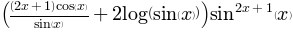

In [14]:
## Derivative

from sympy import Symbol, Derivative, sin, init_printing
x = Symbol('x')
init_printing() ## Initializes the priniting environment
Derivative(sin(x)**(2*x + 1), x).doit()

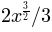

In [15]:
## Indefinite Integral

from sympy import Symbol, Integral, sqrt, sin, init_printing
x = Symbol('x')
init_printing()
Integral(sqrt(x)).doit()

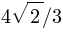

In [16]:
# Definite Integral

from sympy import Symbol, Integral, sqrt
x = Symbol('x')
Integral(sqrt(x), (x, 0, 2)).doit()

In [21]:
# Definite Integral

from sympy import Symbol, Integral, sqrt, cos
x = Symbol('x')
Integral(cos(x), (x, 0, 2)).doit()

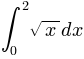

In [23]:
# Definite Integral

from sympy import Symbol, Integral, sqrt, cos
x = Symbol('x')
Integral(sqrt((x)), (x, 0, 2))

## Animation

In [25]:
from IPython.display import YouTubeVideo
YouTubeVideo('8uWRVh58KdQ')

## Gradient Descent

In [26]:
%matplotlib inline

'''
grad_descent.py

Use gradient descent to find the minimum value of a 
single variable function. This also checks for the existence
of a solution for the equation, f'(x) = 0 and plots the intermediate
points traversed
'''

from sympy import Derivative, Symbol, sympify, solve
import matplotlib.pyplot as plt

def grad_descent(x0, f1x, x):
    #check if flx = 0 has solution
    if not solve(f1x):
        print ('Cannot continue, solution for {0} = 0 does not exist'. format(f1x))
        return None
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
    
    # list to store the X values traversed
    X_traversed = []
    while abs(x_old - x_new) > epsilon:
        X_traversed.append(x_new)
        x_old = x_new
        x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
    
    return x_new, X_traversed

In [27]:
def frange(start, final, interval):
    numbers = []
    while start < final:
        numbers.append(start)
        start = start + interval
        
    return numbers

In [28]:
def create_plot(X_traversed, f, var):
    # First create the graph of the function itself.
    x_val = frange(-1, 1, 0.01)
    f_val = [f.subs({var:x}) for x in x_val]
    plt.plot(x_val, f_val, 'bo')
    
    # Calculate the function value at each of the intermediate
    # points traversed
    
    f_traversed = [f.subs({var:x}) for x in X_traversed]
    plt.plot(X_traversed, f_traversed, 'r.')
    plt.legend(['Function', 'Intermediate Points'], loc = 'best')
    plt.show()

Enter a function in one variable: 2*x**2
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 0.1
x: 0.00249835428521054
Minimum value: 0.0000124835482688597


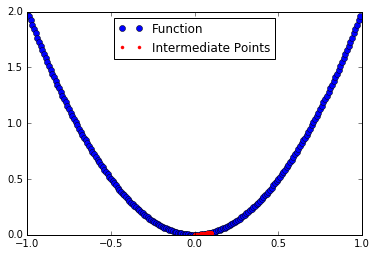

In [29]:
if __name__=='__main__':
    
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    
    try:
        f = sympify(f) # sympify converts a string into converts to be useful later
    except SympifyError:
        print ('Invalid function entered')
        
    else: 
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_min, X_traversed = grad_descent(var0, d, var)
        
        if var_min:
            print('{0}: {1}'.format(var.name, var_min))
            print('Minimum value: {0}'.format(f.subs({var:var_min})))
            create_plot(X_traversed, f, var)

## Simple Linear Regression

In [30]:
%matplotlib inline

In [31]:
## Using Gradient Descent for Linear Regression
# Ideas from https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

# We will attempt to predict the college admission test score based
# on the high school math score 

# Known data
x_data = [83, 85, 84, 96, 94, 86, 87, 97, 97, 85]
y_data = [85, 87, 86, 97, 96, 88, 89, 98, 98, 87]

from sympy import Symbol, Derivative
import matplotlib.pyplot as plt

# Assume linear model
# x = math score in high school
# y = admission test score

# y= m*x + c

def estimate_y(x, m, c):
    y_estimate = m*x + c
    return y_estimate

In [36]:
def estimate_theta(m_current, c_current, max_iterations = 50000):
    learning_rate = 0.0001
    m_gradient = 0
    c_gradient = 0
    N = len(x_data)
    
    m = Symbol('m')
    c = Symbol('c')
    y = Symbol('y')
    x = Symbol('x')
    
    ## Error term
    error_term = (y - (m*x + c))**2
    ## Error Function = 1/n*sum(error_term)
    
    for i in range(max_iterations):
        for i in range(0, N):
            m_gradient += (1/N)*Derivative(error_term, m).doit().subs({x:x_data[i], y:y_data[i], m:m_current, c:c_current})
            c_gradient += (1/N)*Derivative(error_term, m).doit().subs({x:x_data[i], y:y_data[i], m:m_current, c:c_current})
        
        m_new = m_current -(learning_rate * m_gradient)
        c_new = c_current -(learning_rate * c_gradient)
        
        if abs(m_new - m_current) < 1e-5 or abs(c_new - c_current) < 1e-5:
            break
        else:
            m_current = m_new
            c_current = c_new
    return m_new, c_new
            
    

In [37]:
m, c = estimate_theta(1, 1)

In [39]:
print ('m = {0}, c = {1}'.format(m,c))

m = 1.01489201980472, c = 1.01489201980472


In [40]:
m

In [41]:
c

In [42]:
## Let's try this and unknow set of data
# This data is different and widely spread
# but they are very similarly correlated
x_data = [63, 61, 98, 76, 74, 59, 40, 87, 71, 75]
y_data = [65, 62, 99, 78, 75, 60, 42, 89, 71, 77]

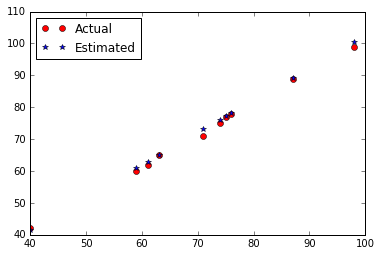

In [43]:
y_estimated = [estimate_y(x, m, c) for x in x_data]
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_estimated, 'b*')
plt.legend(['Actual', 'Estimated'], loc = 'best')
plt.show()